In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('anova_60.csv')

In [3]:
df['Dur'].max()

KeyError: 'Dur'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
cf_matrix = confusion_matrix(y_test, rfc_pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

NameError: name 'confusion_matrix' is not defined

In [5]:
df1['Dur'].max()

NameError: name 'df1' is not defined

In [6]:
df1.info()

NameError: name 'df1' is not defined

## KNN test on 5 sec

In [4]:
df1 = pd.read_csv('anova_5.csv')

In [15]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df1.drop('Class',axis=1)
y_test = df1['Class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis=1))
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler.fit(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,State_CON,State_FIN,DstRate,SrcRate,Dur,Rate,TcpRtt,AckDat,SynAck,Load
0,0.819903,-0.764713,0.532140,0.523653,-0.698259,0.469557,-0.417411,-0.413446,-0.506988,0.259193
1,0.819903,-0.764713,-0.561296,-0.567413,2.011270,-0.609099,-0.428471,-0.425388,-0.417606,-0.416549
2,-1.219657,1.307680,-0.561456,-0.567573,0.042144,-0.609196,0.102074,0.099048,0.338073,-0.416784
3,0.819903,-0.764713,2.907228,2.893595,-0.698276,2.812356,-0.428548,-0.425076,-0.458234,1.727297
4,0.819903,-0.764713,2.827025,2.813566,-0.698276,2.733243,-0.421072,-0.417115,-0.506988,1.677721


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[473  27]
 [ 33 467]]


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred, target_names=['Class 1', 'Class 2']))



Accuracy: 0.94

Micro Precision: 0.94
Micro Recall: 0.94
Micro F1-score: 0.94

Macro Precision: 0.94
Macro Recall: 0.94
Macro F1-score: 0.94

Weighted Precision: 0.94
Weighted Recall: 0.94
Weighted F1-score: 0.94

Classification Report

              precision    recall  f1-score   support

     Class 1       0.93      0.95      0.94       500
     Class 2       0.95      0.93      0.94       500

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



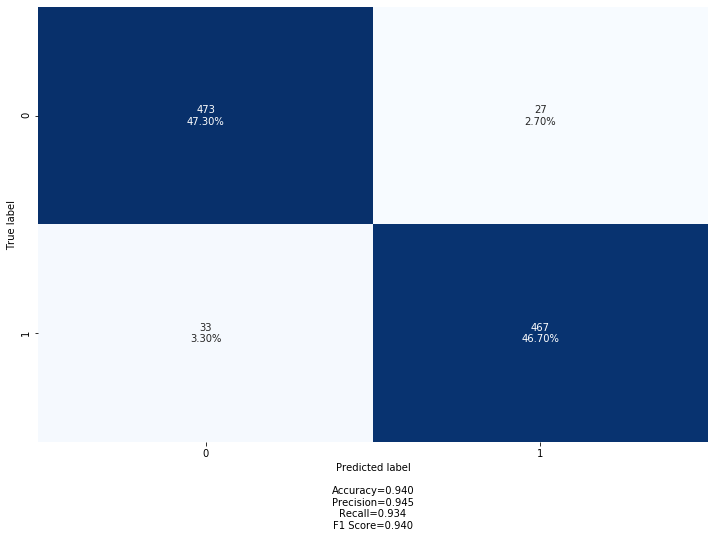

In [18]:
cf_matrix = confusion_matrix(y_test, pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

## KNN test on 10 sec

In [19]:

df2 = pd.read_csv('anova_10.csv')

In [20]:
df2['Dur'].max()

9.999908999999999

In [21]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df2.drop('Class',axis=1)
y_test = df2['Class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis=1))
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler.fit(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,State_CON,State_FIN,DstRate,SrcRate,Dur,Rate,TcpRtt,AckDat,SynAck,Load
0,0.819903,-0.764713,0.532140,0.523653,-0.698259,0.469557,-0.417411,-0.413446,-0.506988,0.259193
1,0.819903,-0.764713,-0.561296,-0.567413,2.011270,-0.609099,-0.428471,-0.425388,-0.417606,-0.416549
2,-1.219657,1.307680,-0.561456,-0.567573,0.042144,-0.609196,0.102074,0.099048,0.338073,-0.416784
3,0.819903,-0.764713,2.907228,2.893595,-0.698276,2.812356,-0.428548,-0.425076,-0.458234,1.727297
4,0.819903,-0.764713,2.827025,2.813566,-0.698276,2.733243,-0.421072,-0.417115,-0.506988,1.677721


In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[485  15]
 [ 63 437]]


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred, target_names=['Class 1', 'Class 2']))



Accuracy: 0.92

Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

Macro Precision: 0.93
Macro Recall: 0.92
Macro F1-score: 0.92

Weighted Precision: 0.93
Weighted Recall: 0.92
Weighted F1-score: 0.92

Classification Report

              precision    recall  f1-score   support

     Class 1       0.89      0.97      0.93       500
     Class 2       0.97      0.87      0.92       500

    accuracy                           0.92      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.92      0.92      1000



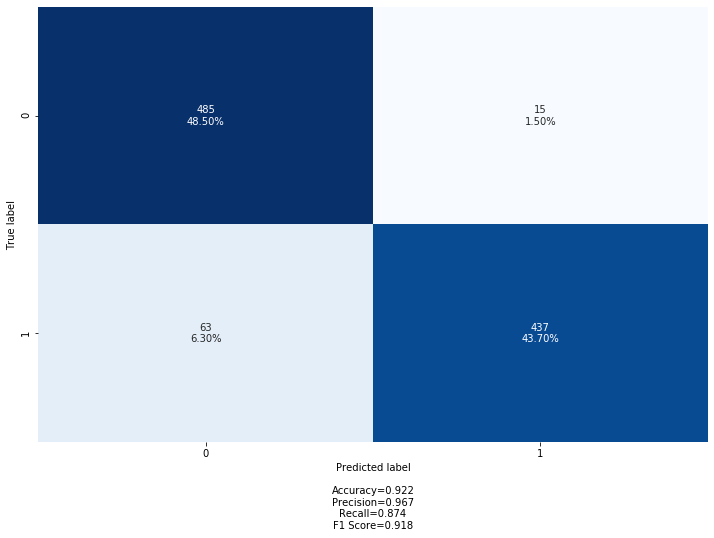

In [24]:
cf_matrix = confusion_matrix(y_test, pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

## KNN test on 15 sec


In [18]:
df3 = pd.read_csv('chi_features_b_15.csv')

In [19]:
df3['Dur'].max()

KeyError: 'Dur'

In [20]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df3.drop('Class',axis=1)
y_test = df3['Class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis=1))
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler.fit(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,Load,TotBytes,SrcBytes,DstBytes,TotPkts,SrcPkts,SrcRate,DstPkts,Rate,DstRate
0,0.259193,-0.080918,-0.080670,-0.113785,-0.085589,-0.083338,0.523653,-0.096243,0.469557,0.532140
1,-0.416549,-0.080512,-0.080466,-0.085013,-0.081481,-0.080898,-0.567413,-0.083440,-0.609099,-0.561296
2,-0.416784,-0.080901,-0.080662,-0.112545,-0.085273,-0.083151,-0.567573,-0.095258,-0.609196,-0.561456
3,1.727297,-0.080918,-0.080670,-0.113785,-0.085589,-0.083338,2.893595,-0.096243,2.812356,2.907228
4,1.677721,-0.080918,-0.080670,-0.113785,-0.085589,-0.083338,2.813566,-0.096243,2.733243,2.827025


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[460  40]
 [ 19 481]]


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred, target_names=['Class 1', 'Class 2']))



Accuracy: 0.94

Micro Precision: 0.94
Micro Recall: 0.94
Micro F1-score: 0.94

Macro Precision: 0.94
Macro Recall: 0.94
Macro F1-score: 0.94

Weighted Precision: 0.94
Weighted Recall: 0.94
Weighted F1-score: 0.94

Classification Report

              precision    recall  f1-score   support

     Class 1       0.96      0.92      0.94       500
     Class 2       0.92      0.96      0.94       500

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



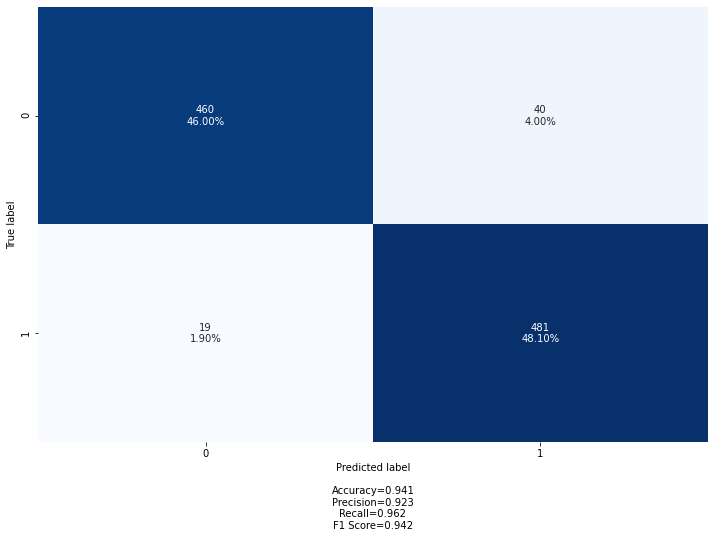

In [23]:
cf_matrix = confusion_matrix(y_test, pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

## KNN test on 20 sec


In [15]:
df4 = pd.read_csv('anova_20.csv')

FileNotFoundError: [Errno 2] File anova_20.csv does not exist: 'anova_20.csv'

In [25]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df4.drop('Class',axis=1)
y_test = df4['Class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis=1))
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler.fit(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,Load,TotBytes,SrcBytes,DstBytes,TotPkts,SrcPkts,SrcRate,DstPkts,Rate,DstRate
0,0.259193,-0.080918,-0.080670,-0.113785,-0.085589,-0.083338,0.523653,-0.096243,0.469557,0.532140
1,-0.416549,-0.080512,-0.080466,-0.085013,-0.081481,-0.080898,-0.567413,-0.083440,-0.609099,-0.561296
2,-0.416784,-0.080901,-0.080662,-0.112545,-0.085273,-0.083151,-0.567573,-0.095258,-0.609196,-0.561456
3,1.727297,-0.080918,-0.080670,-0.113785,-0.085589,-0.083338,2.893595,-0.096243,2.812356,2.907228
4,1.677721,-0.080918,-0.080670,-0.113785,-0.085589,-0.083338,2.813566,-0.096243,2.733243,2.827025


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[465  35]
 [ 15 485]]


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred, target_names=['Class 1', 'Class 2']))



Accuracy: 0.95

Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95

Macro Precision: 0.95
Macro Recall: 0.95
Macro F1-score: 0.95

Weighted Precision: 0.95
Weighted Recall: 0.95
Weighted F1-score: 0.95

Classification Report

              precision    recall  f1-score   support

     Class 1       0.97      0.93      0.95       500
     Class 2       0.93      0.97      0.95       500

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



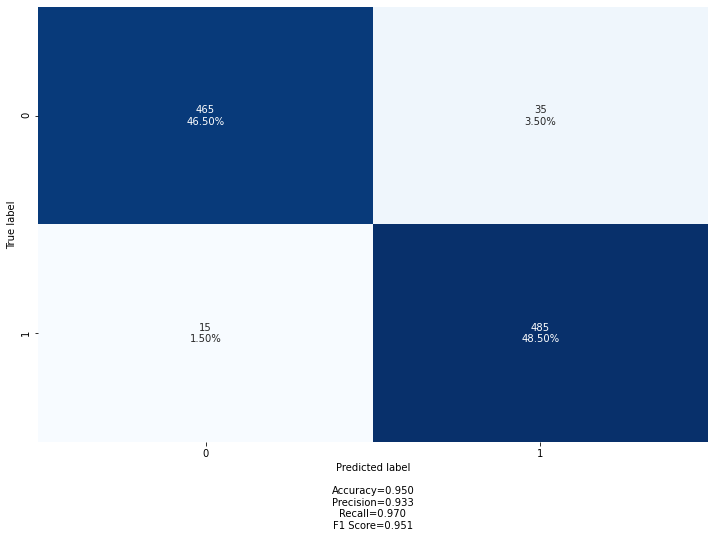

In [28]:
cf_matrix = confusion_matrix(y_test, pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

## KNN test on 25 sec


In [25]:
df6 = pd.read_csv('anova_25.csv')

In [26]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df6.drop('Class',axis=1)
y_test = df6['Class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis=1))
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler.fit(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,State_CON,State_FIN,DstRate,SrcRate,Dur,Rate,TcpRtt,AckDat,SynAck,Load
0,0.819903,-0.764713,0.532140,0.523653,-0.698259,0.469557,-0.417411,-0.413446,-0.506988,0.259193
1,0.819903,-0.764713,-0.561296,-0.567413,2.011270,-0.609099,-0.428471,-0.425388,-0.417606,-0.416549
2,-1.219657,1.307680,-0.561456,-0.567573,0.042144,-0.609196,0.102074,0.099048,0.338073,-0.416784
3,0.819903,-0.764713,2.907228,2.893595,-0.698276,2.812356,-0.428548,-0.425076,-0.458234,1.727297
4,0.819903,-0.764713,2.827025,2.813566,-0.698276,2.733243,-0.421072,-0.417115,-0.506988,1.677721


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[489  11]
 [ 35 465]]


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred, target_names=['Class 1', 'Class 2']))



Accuracy: 0.95

Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95

Macro Precision: 0.96
Macro Recall: 0.95
Macro F1-score: 0.95

Weighted Precision: 0.96
Weighted Recall: 0.95
Weighted F1-score: 0.95

Classification Report

              precision    recall  f1-score   support

     Class 1       0.93      0.98      0.96       500
     Class 2       0.98      0.93      0.95       500

    accuracy                           0.95      1000
   macro avg       0.96      0.95      0.95      1000
weighted avg       0.96      0.95      0.95      1000



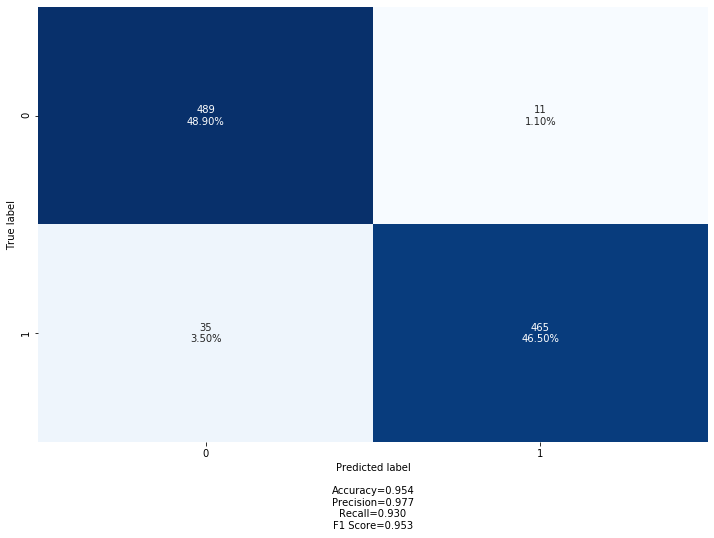

In [29]:
cf_matrix = confusion_matrix(y_test, pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

## KNN test on 30 sec


In [30]:
df5 = pd.read_csv('anova_30.csv')

In [31]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df5.drop('Class',axis=1)
y_test = df5['Class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis=1))
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler.fit(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,State_CON,State_FIN,DstRate,SrcRate,Dur,Rate,TcpRtt,AckDat,SynAck,Load
0,0.819903,-0.764713,0.532140,0.523653,-0.698259,0.469557,-0.417411,-0.413446,-0.506988,0.259193
1,0.819903,-0.764713,-0.561296,-0.567413,2.011270,-0.609099,-0.428471,-0.425388,-0.417606,-0.416549
2,-1.219657,1.307680,-0.561456,-0.567573,0.042144,-0.609196,0.102074,0.099048,0.338073,-0.416784
3,0.819903,-0.764713,2.907228,2.893595,-0.698276,2.812356,-0.428548,-0.425076,-0.458234,1.727297
4,0.819903,-0.764713,2.827025,2.813566,-0.698276,2.733243,-0.421072,-0.417115,-0.506988,1.677721


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[480  20]
 [ 31 469]]


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred, target_names=['Class 1', 'Class 2']))



Accuracy: 0.95

Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95

Macro Precision: 0.95
Macro Recall: 0.95
Macro F1-score: 0.95

Weighted Precision: 0.95
Weighted Recall: 0.95
Weighted F1-score: 0.95

Classification Report

              precision    recall  f1-score   support

     Class 1       0.94      0.96      0.95       500
     Class 2       0.96      0.94      0.95       500

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



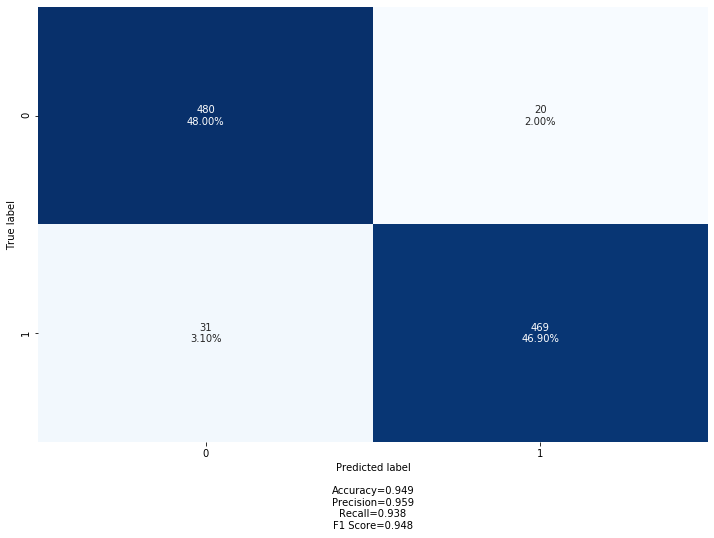

In [34]:
cf_matrix = confusion_matrix(y_test, pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

# KNN test on 60 sec


In [4]:
from sklearn.model_selection import train_test_split
X = df.drop('Class',axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis=1))
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler.fit(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,State_CON,State_FIN,DstRate,SrcRate,Dur,Rate,TcpRtt,AckDat,SynAck,Load
0,0.819903,-0.764713,0.532140,0.523653,-0.698259,0.469557,-0.417411,-0.413446,-0.506988,0.259193
1,0.819903,-0.764713,-0.561296,-0.567413,2.011270,-0.609099,-0.428471,-0.425388,-0.417606,-0.416549
2,-1.219657,1.307680,-0.561456,-0.567573,0.042144,-0.609196,0.102074,0.099048,0.338073,-0.416784
3,0.819903,-0.764713,2.907228,2.893595,-0.698276,2.812356,-0.428548,-0.425076,-0.458234,1.727297
4,0.819903,-0.764713,2.827025,2.813566,-0.698276,2.733243,-0.421072,-0.417115,-0.506988,1.677721


In [5]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Class'],
                                                    test_size=0.30)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))

NameError: name 'confusion_matrix' is not defined

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred, target_names=['Class 1', 'Class 2']))



Accuracy: 0.99

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.99
Macro Recall: 0.99
Macro F1-score: 0.99

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99

Classification Report

              precision    recall  f1-score   support

     Class 1       0.99      0.99      0.99       143
     Class 2       0.99      0.99      0.99       157

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [7]:
cf_matrix = confusion_matrix(y_test, pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

NameError: name 'confusion_matrix' is not defined

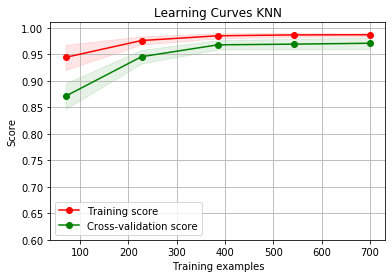

In [10]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring='f1_macro')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X = df.drop('Class',axis=1)
y = df['Class']



title = "Learning Curves KNN"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)
knn_cv = KNeighborsClassifier(n_neighbors=2)
plot_learning_curve(knn_cv, title, X, y, (0.6, 1.01), cv=cv, n_jobs=10)

plt.show()